# TAREA 1 - Estadística Multivariada POS 2024-2

Utilice un conjunto de datos cunatitativos, seleccionado en un contexto que sea facilmente interpretable para usted y en el que cuente mínimo con 10 variables, para:

- Determinar las matrices de varianza-covarianza y correlación para el conjunto de datos completo, analizar las correlaciones existente entre las variables.
- Obtener los valores propios y vectores propios tanto para el ACP como para el AF. Qué información se puede extraer de los valores y vectores propios obtenidos?
- Determinar vectores propios significativos y la varianza explicada por cada análisis factorial.
- Calcular los PCs y factores a partir de los vectores propios significativos
- Analizar los biplots de ambos métodos.
- Comparar las dos técnicas de análisis multivariado con base en la información obtenida en los puntos anteriores.
- ¿Cuál de los dos métodos es el adecuado para el conjunto de datos?


#### BASE DE DATOS USADA:

El World Happiness Report es una publicación anual que evalúa la felicidad en diversos países, utilizando datos de encuestas realizadas por Gallup. Desde su inicio en 2012, este informe ha sido respaldado por la Red de Soluciones para el Desarrollo Sostenible de las Naciones Unidas y se basa en la evaluación de la calidad de vida que realizan los ciudadanos, quienes califican su satisfacción vital en una escala del 0 al 10, conocida como la Escalera de Cantril.

#### Metodología

El informe se fundamenta en una serie de variables que se han demostrado estar asociadas con la felicidad. Estas incluyen:
- PIB per cápita: Refleja el nivel de ingresos y la economía de un país.
- Apoyo social: Mide la red de apoyo que tienen los individuos.
- Esperanza de vida saludable: Indica la salud general de la población.
- Libertad para tomar decisiones: Evalúa la autonomía de los ciudadanos.
- Generosidad: Considera las donaciones y actos altruistas.
- Percepción de corrupción: Mide cuán corruptos son percibidos los gobiernos y empresas.


## Análisis de Componentes Principales (ACP) y Análisis Factorial (AF)

In [73]:
# Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.preprocessing import StandardScaler
from pingouin import multivariate_normality
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity
from scipy.stats import bartlett
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import Rotator
from scipy.stats import shapiro

### 0. Pre-procesamiento de los datos

In [74]:
# Cargar el dataset
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [75]:
# Renoimbrar las columnas como A1, A2, A3, ..., AN
df.columns = ['A'+str(i) for i in range(1, len(df.columns)+1)]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Se renombran las columnas para visualizar mejor las tablas y los graficos. El mapeo de las variables es el siguiente:

- Country name:                                 A1
- Regional indicator:                           A2
- Ladder score:                                 A3
- Standard error of ladder score:               A4
- upperwhisker:                                 A5
- lowerwhisker:                                 A6
- Logged GDP per capita:                        A7
- Social support:                               A8
- Healthy life expectancy:                      A9
- Freedom to make life choices:                 A10
- Generosity:                                   A11
- Perceptions of corruption:                    A12
- Ladder score in Dystopia:                     A13
- Explained by: Log GDP per capita:             A14
- Explained by: Social support:                 A15
- Explained by: Healthy life expectancy:        A16
- Explained by: Freedom to make life choices:   A17
- Explained by: Generosity:                     A18
- Explained by: Perceptions of corruption:      A19
- Dystopia + residual:                          A20

In [76]:
# Remover observaciones con campos vacios
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      149 non-null    object 
 1   A2      149 non-null    object 
 2   A3      149 non-null    float64
 3   A4      149 non-null    float64
 4   A5      149 non-null    float64
 5   A6      149 non-null    float64
 6   A7      149 non-null    float64
 7   A8      149 non-null    float64
 8   A9      149 non-null    float64
 9   A10     149 non-null    float64
 10  A11     149 non-null    float64
 11  A12     149 non-null    float64
 12  A13     149 non-null    float64
 13  A14     149 non-null    float64
 14  A15     149 non-null    float64
 15  A16     149 non-null    float64
 16  A17     149 non-null    float64
 17  A18     149 non-null    float64
 18  A19     149 non-null    float64
 19  A20     149 non-null    float64
dtypes: float64(18), object(2)
memory usage: 23.4+ KB


Realmente, no habian campos con valores NULL, pero se debe verificar siempre esto.

In [77]:
# Remover variables que no se utilizaran
df = df.drop(['A1', 'A2', 'A13'], axis=1)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Las variables tipo $Object$ ($A1$, $A2$) son removidas ya que no sirven en este tipo de análisis por no ser cuantitativas.

De la misma forma, la variable $A13$ también se elimina ya que todos sus valores son idénticos y esto genera valores NaN en la matriz de Correlación.

In [78]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

In [79]:
# Redondear la base de datos con 5 decimales
df = df.round(3)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
0,2.157,-1.220,2.147,2.165,1.163,1.216,1.040,1.394,-0.552,-3.031,1.162,1.212,1.040,1.399,-0.552,3.034,1.535
1,1.950,-1.083,1.940,1.956,1.300,1.216,1.144,1.367,0.301,-3.070,1.301,1.220,1.144,1.363,0.306,3.070,0.817
2,1.904,-1.038,1.899,1.908,1.459,1.111,1.396,1.128,0.267,-2.438,1.460,1.107,1.393,1.123,0.265,2.438,0.763
3,1.888,0.011,1.924,1.852,1.252,1.469,1.188,1.447,1.166,-0.305,1.252,1.468,1.186,1.450,1.174,0.306,1.002
4,1.804,-1.448,1.780,1.826,1.299,1.111,1.099,1.075,1.266,-2.180,1.299,1.107,1.097,1.079,1.266,2.183,0.686


## 1. Matrices de Varianza-Covarianza y de Correlación

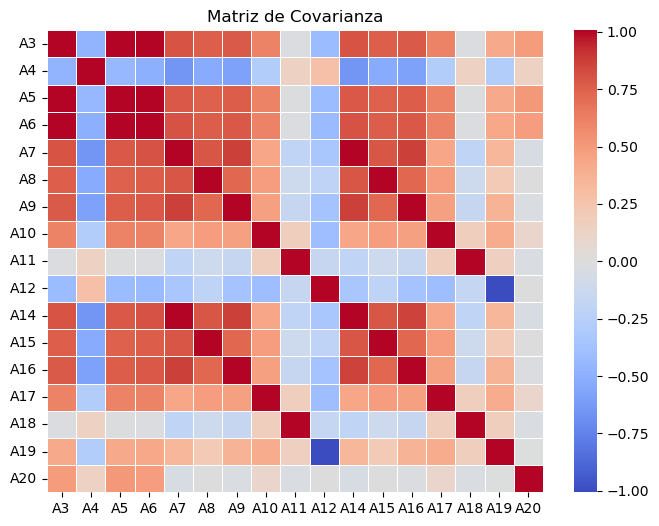

In [80]:
# Calculo de matrices de varianza-covarianza
cov_matrix = df.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Covarianza")
plt.show()

In [81]:
resultados_normalidad = {}
for columna in df.columns:
    stat, p_value = shapiro(df[columna])
    resultados_normalidad[columna] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Multinormalidad de las variables (un solo valor)
normalidad = pg.multivariate_normality(df, alpha=.05)
print(normalidad, end='\n\n')

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

HZResults(hz=1.0025480284477395, pval=0.0002916930556046781, normal=False)

    statistic   p-value normal
A3   0.991251  0.489084   True
A4   0.865271       0.0  False
A5   0.991429  0.507622   True
A6   0.991007  0.464258   True
A7   0.965025  0.000768  False
A8   0.924502       0.0  False
A9   0.955288  0.000098  False
A10  0.954547  0.000084  False
A11  0.943003   0.00001  False
A12  0.840728       0.0  False
A14  0.965018  0.000767  False
A15  0.924545       0.0  False
A16   0.95529  0.000098  False
A17  0.954419  0.000082  False
A18  0.943034   0.00001  False
A19  0.840689       0.0  False
A20  0.976022   0.01038  False


El test de normalidad indica que este conjunto de datos no sigue una distribución normal. Se debe aplicar el metodo de $Spearman$ en la correlación por este motivo.

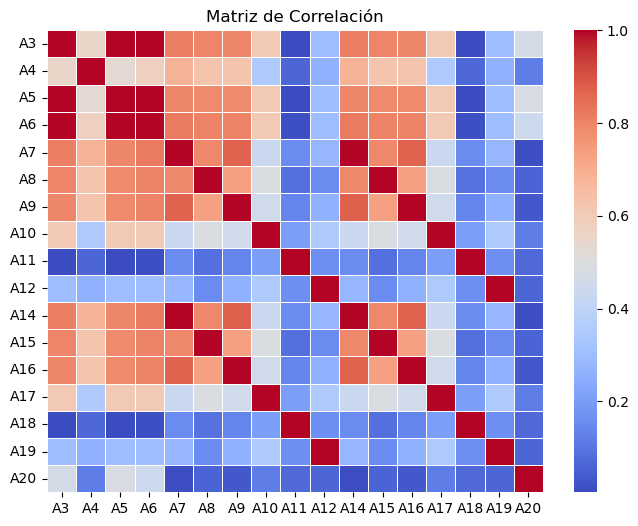

In [82]:
# Calculo de la matriz de correlacion
cor_matrix = df.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix.abs(), annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

La gráfica de correlación se saca en valor absoluto para ver en la figura siguiente, correspondiente a un mapa de calor de la matriz de correlación, solo valores entre 0.0 y 1.0 para ver mas fácil las variables que estan fuertemente correlacionadas entre si, negativa o positivamente.

A simple vista, se puede ver que las filas y columnas en azul corresponden a variables que estan muy poco correlacionadas con las demás. Por lo tanto, serán eliminadas de los análisis posteriores.

In [83]:
# Hacer test de espericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(17146.972330839013, 0.0)

De esta forma, se pueden aplicar cualquier análisis factorial ya que el valor $p$ es 0.0, y, por tanto, existe una correlación estadiaticamente significativa.

In [84]:
# Aplicar criterio de Kaiser-Meyer-Olkin
kmo_all, kmo_model = calculate_kmo(df)

for i in range(0, len(kmo_all)):
    print(f'{df.columns[i]} es {kmo_all[i]}')

print(f'KMO total es {kmo_model}')

A3 es 0.886979483260365
A4 es 0.8073669582722586
A5 es 0.8504415923927249
A6 es 0.839503656137754
A7 es 0.8321830481007423
A8 es 0.9152762304466756
A9 es 0.8465208539568042
A10 es 0.8399742311214586
A11 es 0.5681740456888245
A12 es 0.6950135106522952
A14 es 0.8966505184531101
A15 es 0.798400845662914
A16 es 0.8688837314919836
A17 es 0.7461251090563543
A18 es 0.5598808830260287
A19 es 0.7450406927419737
A20 es 0.28224479337794045
KMO total es 0.8090417486241176


c:\Users\kevin\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [85]:
# Determinar los KMO menores a 0.6
kmo_menores = [df.columns[i] for i in range(0, len(kmo_all)) if kmo_all[i] < 0.6]
kmo_menores

['A11', 'A18', 'A20']

Como el KMO total es superior a 0.6, en realidad, es 0.83, es muy buen candidato para hacer un análisis factorial.

In [86]:
# Remover variables con baja correlacion
df = df.drop(kmo_menores, axis=1)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A12,A14,A15,A16,A17,A19
0,2.157,-1.220,2.147,2.165,1.163,1.216,1.040,1.394,-3.031,1.162,1.212,1.040,1.399,3.034
1,1.950,-1.083,1.940,1.956,1.300,1.216,1.144,1.367,-3.070,1.301,1.220,1.144,1.363,3.070
2,1.904,-1.038,1.899,1.908,1.459,1.111,1.396,1.128,-2.438,1.460,1.107,1.393,1.123,2.438
3,1.888,0.011,1.924,1.852,1.252,1.469,1.188,1.447,-0.305,1.252,1.468,1.186,1.450,0.306
4,1.804,-1.448,1.780,1.826,1.299,1.111,1.099,1.075,-2.180,1.299,1.107,1.097,1.079,2.183


Las variables anteriores se eliminaron del análisis ya que no aportan al analisis por tener una baja correlación (valores de KMO inferiores a 0.6 fueron removidos del análisis)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A3      149 non-null    float64
 1   A4      149 non-null    float64
 2   A5      149 non-null    float64
 3   A6      149 non-null    float64
 4   A7      149 non-null    float64
 5   A8      149 non-null    float64
 6   A9      149 non-null    float64
 7   A10     149 non-null    float64
 8   A12     149 non-null    float64
 9   A14     149 non-null    float64
 10  A15     149 non-null    float64
 11  A16     149 non-null    float64
 12  A17     149 non-null    float64
 13  A19     149 non-null    float64
dtypes: float64(14)
memory usage: 16.4 KB


#### El análisis de la matriz de correlación muestra que en general, las variables tienen una buena correlación entre sí, por lo que es viable hacer un análisis de componentes principales o análisis factorial en este caso. Sin embargo, hay que descartar del análisis, no del conjunto de datos ni del análisis inferencial posterior, las variables que tuvieron poca correlación con las demás.

## 2. Análisis de componentes principales

In [88]:
# Calcular el PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df)

array([[-5.87689288e+00,  2.93928068e+00,  9.17298200e-01, ...,
         1.93882731e-05,  5.43129553e-04,  2.78544444e-04],
       [-5.80146896e+00,  2.90282332e+00,  1.07200038e+00, ...,
        -1.44029343e-03, -6.49964630e-04, -3.08270525e-04],
       [-5.61808262e+00,  1.99469206e+00,  1.02280423e+00, ...,
         4.39188720e-04, -6.72574275e-04,  4.41146078e-04],
       ...,
       [ 3.00149768e+00,  5.72961117e+00,  1.45166398e+00, ...,
        -1.27470156e-04, -5.05850177e-04,  4.77403458e-04],
       [ 4.55138266e+00, -2.53585021e-01,  5.93607856e-01, ...,
         1.05459773e-04,  1.86605598e-04, -2.92075160e-04],
       [ 8.12278092e+00, -1.25539857e+00,  3.52660645e+00, ...,
        -1.32917664e-03,  7.25290034e-04, -3.28043887e-04]])

### 2.1. Valores y Vectores Propios PCA y Varianza Explicada

In [89]:
# Obtener tablas de componentes principales y eigenvalores
eigenvalues = pca.explained_variance_
percentage_var = pca.explained_variance_ratio_
acum_percentage_var = np.cumsum(percentage_var)

# Crear tabla de componentes principales
components = range(1, len(eigenvalues) + 1)
components_table = pd.DataFrame({'Eigenvalue': eigenvalues, 'Explained Variance': percentage_var, 'Cumulative Explained Variance': acum_percentage_var})
components_table

,Eigenvalue,Explained Variance,Cumulative Explained Variance
0,9.104862e+00,6.459737e-01,0.645974
1,1.873127e+00,1.328950e-01,0.778869
2,1.260378e+00,8.942153e-02,0.868290
3,6.837245e-01,4.850903e-02,0.916799
4,5.076665e-01,3.601803e-02,0.952817
5,4.213094e-01,2.989115e-02,0.982708
6,2.437050e-01,1.729044e-02,0.999999
7,5.836176e-06,4.140663e-07,0.999999
8,4.406299e-06,3.126190e-07,1.000000
9,3.532286e-06,2.506094e-07,1.000000


De la tabla anterior se puede deducir que para representar al menos el 70% de la variabilidad total de los datos es suficiente con dos componentes principales.

La varianza explicada de cada componente es proporcional al valor propio obtenido. Si el valor propio es grande entonces la varianza explicada también lo es en proporción.

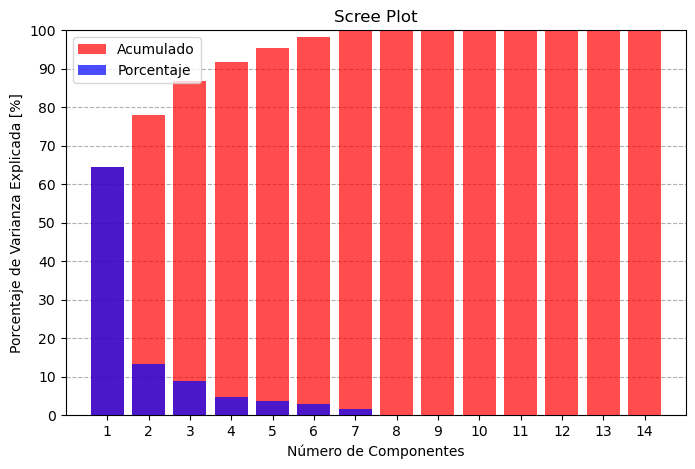

In [90]:
def scree_plot(components_table):
    percentages = components_table['Explained Variance']
    acumulados = components_table['Cumulative Explained Variance']

    # Gráfico de Scree Plot
    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(1, len(percentages) + 1), acumulados * 100, color="red", zorder=2, alpha=0.7, label='Acumulado')
    plt.bar(np.arange(1, len(percentages) + 1), percentages * 100, color="blue", zorder=3, alpha=0.7, label='Porcentaje')
    plt.title('Scree Plot')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Porcentaje de Varianza Explicada [%]')
    plt.xlim(0, len(percentages) + 1)
    plt.ylim(0, 100)
    plt.xticks(np.arange(1, len(percentages) + 1))
    plt.yticks(np.arange(0, 101, 10))
    plt.grid(axis='y', linestyle='--', zorder=0)
    plt.legend()
    plt.show()

scree_plot(components_table)

In [91]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_table = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(1, len(loadings) + 1)], index=df.columns)
loadings_table.abs()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
A3,0.931662,0.009227,0.106318,0.286626,0.016958,0.209461,0.031545,0.000027,0.000029,0.000012,0.000056,0.000050,1.039575e-06,3.098852e-04
A4,0.632029,0.170169,0.326460,0.555112,0.103495,0.377247,0.102743,0.000002,0.000009,0.000006,0.000036,0.000037,5.425616e-07,1.651697e-06
A5,0.923109,0.016335,0.121755,0.314700,0.021529,0.198044,0.027962,0.000034,0.000102,0.000070,0.000463,0.000481,6.957492e-06,1.320590e-04
A6,0.938763,0.002347,0.091470,0.259307,0.012496,0.220355,0.034990,0.000008,0.000136,0.000060,0.000424,0.000449,6.236377e-06,1.787350e-04
A7,0.910068,0.228422,0.187457,0.049615,0.073033,0.041806,0.285728,0.000037,0.000017,0.000017,0.000009,0.000006,4.186530e-04,2.793112e-07
A8,0.854496,0.304389,0.105790,0.001324,0.369177,0.180783,0.061039,0.000121,0.001318,0.000589,0.000024,0.000056,5.931947e-06,5.903569e-06
A9,0.893619,0.161809,0.170705,0.040373,0.298377,0.183451,0.169294,0.000088,0.000114,0.000059,0.000541,0.000384,6.497138e-07,3.012170e-06
A10,0.668423,0.407366,0.573551,0.241021,0.070064,0.032196,0.031814,0.001701,0.000092,0.000031,0.000035,0.000018,9.600304e-06,3.657653e-06
A12,0.498179,0.764937,0.393848,0.037161,0.111099,0.067770,0.002551,0.000009,0.000655,0.001188,0.000039,0.000035,3.514909e-06,2.275715e-06
A14,0.910069,0.228385,0.187454,0.049706,0.073009,0.041830,0.285767,0.000037,0.000017,0.000018,0.000009,0.000006,4.186036e-04,3.074194e-07


De la tabla correspondiente a las cargas factoriales, se puede deducir entonces que los componentes principales que se tomen, por ejemplo, 2 componentes para tener un grafico en dos dimensiones que represente el ~84% de la variabilidad total de los datos, las posibles combinaciones lineales para esos dos componentes son:

- $PC1=A3\times 0.931662+A4\times 0.632029+A5\times 0.923109+A6\times 0.938763+A7\times 0.910068+A8\times 0.854496+A9\times 0.893619+A10\times 0.668423+A14\times 0.910069+A15\times 0.854527+A16\times 0.893589+A17\times 0.668455$

- $PC2=A12\times 0.764937+A19\times 0.764913$

### 2.2. Gráfico Biplot 

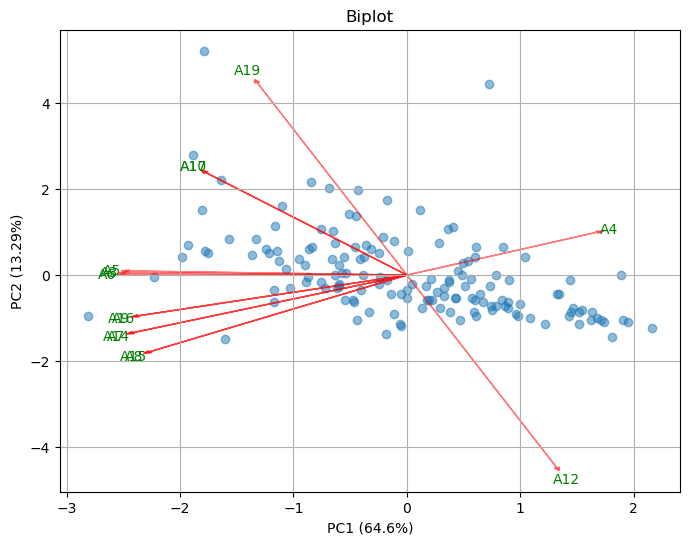

In [92]:
# Grafica del Biplot de los componentes principales
def biplot_pca(pca, data, title="Biplot", a=1.5):
    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.5)
    for i in range(data.shape[1]):
        plt.arrow(0, 0, pca.components_[0, i] * a, pca.components_[1, i] * a, color='r', alpha=0.5, head_width=0.05)
        plt.text(pca.components_[0, i] * (a + .5), pca.components_[1, i] * (a + .5), data.columns[i], color='g', ha='center', va='center')
    plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)")
    plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)")
    plt.title(title)
    plt.grid()
    plt.show()

biplot_pca(pca, df, title="Biplot", a=8.0)

Los componentes principales definidos anteriormente se pueden ver en la figura del biplot, donde hay algunos vectores muy juntos que indican una fuerte correlacion positiva, y algunos otros una fuerte correlacion negativa, como A4.

Por otro lado, hay dos vectores (A19 y A12) que tienen una muy buena correlación negativa, pero no tiene mucha correlación con los demas, por lo tanto, esos dos vectores forman el PC2 mostrado mas arriba. Mientras que los demás forman el PC1.

## 3. Análisis Factorial

### 3.1. Análisis de la normalidad de los datos

In [93]:
resultados_normalidad = {}
for columna in range(df.shape[1]):
    stat, p_value = shapiro(df.iloc[:, columna])
    resultados_normalidad[df.columns[columna]] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Multinormalidad de las variables (un solo valor)
normalidad = pg.multivariate_normality(df, alpha=0.05)
print(normalidad, end='\n\n')

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

HZResults(hz=1.0083474772695198, pval=2.384339802511838e-05, normal=False)

    statistic   p-value normal
A3   0.991251  0.489084   True
A4   0.865271       0.0  False
A5   0.991429  0.507622   True
A6   0.991007  0.464258   True
A7   0.965025  0.000768  False
A8   0.924502       0.0  False
A9   0.955288  0.000098  False
A10  0.954547  0.000084  False
A12  0.840728       0.0  False
A14  0.965018  0.000767  False
A15  0.924545       0.0  False
A16   0.95529  0.000098  False
A17  0.954419  0.000082  False
A19  0.840689       0.0  False


Como no es normal, usar MLE no funciona en este caso.

### 3.2. Estimar el Numero de Factores Requeridos

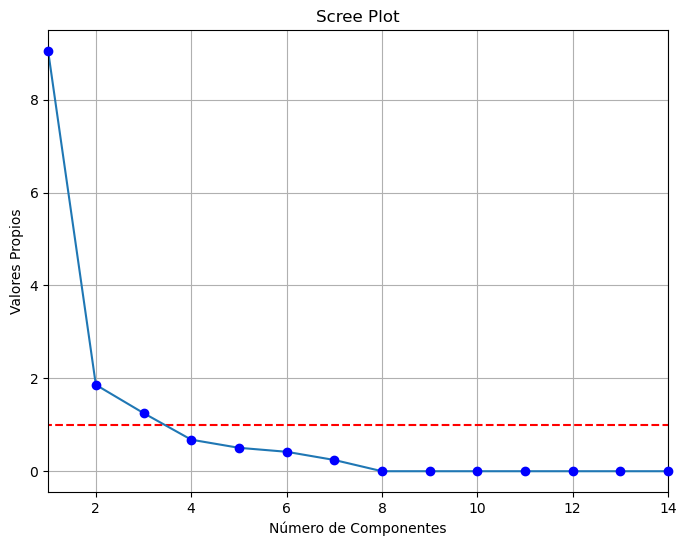

In [94]:
fa = FactorAnalyzer()
fa.fit(df)

ev, v = fa.get_eigenvalues()

# scree plot for validating the number of factors:
plt.figure(figsize=(8, 6))
plt.scatter(range(1, df.shape[1] + 1), ev, color='b', zorder=3, clip_on=False)
plt.hlines(1, 0, df.shape[1], colors='r', linestyles='dashed', color='r')
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Valores Propios')
plt.xlim(1, df.shape[1])
plt.grid()
plt.show()

Es posible usar 3 factores para representar la variabilidad total de los datos. Sin embargo, mas adelante se ve que al usar solo 2 factores tenemos más del 70% de la variabilidad de los datos.

### 3.3. Varianza explicada

In [95]:
# Analisis de factores
fa = FactorAnalyzer(n_factors=2, rotation=None, method='minres')
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

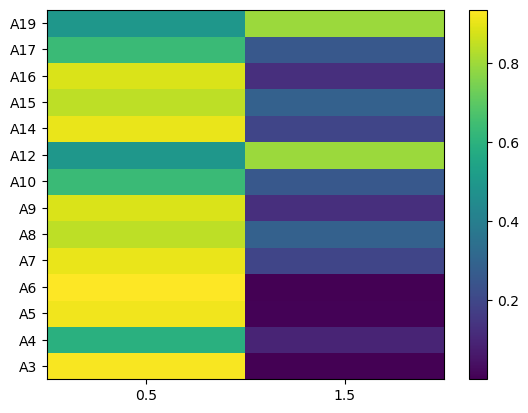

In [96]:
# Extraer las cargas factoriales
factor_loadings = fa.loadings_
factor_communalities = fa.get_communalities()
factors = fa.transform(df)

df_loadings = pd.DataFrame(data=factor_loadings, columns=['Factor 1', 'Factor 2'])
df_loadings.index = df.columns

Z=np.abs(factor_loadings)
plt.pcolor(Z)
plt.colorbar()
ax = plt.gca()
ax.set_yticks(np.arange(factor_loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(factor_loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.keys())
# ax.set_xticklabels("Factor 1", "Factor 2")
plt.show()

In [97]:
# Obtener la varianza explicada
factor_variance = fa.get_factor_variance()
factor_variance_df = pd.DataFrame(data=factor_variance, columns=['Factor 1', 'Factor 2'], index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
print(factor_variance_df)

                Factor 1  Factor 2
SS Loadings     8.821747  1.673827
Proportion Var  0.630125  0.119559
Cumulative Var  0.630125  0.749684


### 3.4. Determinar los Valores y Vectores Propios

In [98]:
# Factor analysis with two different methods
fa_minres = FactorAnalyzer(n_factors=2, method='minres', is_corr_matrix=False)
fa_minres.fit(df)
fa_mle = FactorAnalyzer(n_factors=2, method='ml', is_corr_matrix=False)
fa_mle.fit(df)

FactorAnalyzer(method='ml', n_factors=2, rotation_kwargs={})

In [99]:
# Comparar comunalidades
c1 = np.sort(fa_mle.get_communalities())[::-1]
c2 = np.sort(fa_minres.get_communalities())[::-1]
print(pd.DataFrame({'MLE': c1, 'MINRES': c2}).head())

        MLE    MINRES
0  0.881919  1.068267
1  0.881863  1.068099
2  0.786394  0.997505
3  0.785974  0.996946
4  0.703335  0.928613


In [100]:
# Comparar unicidades
u1 = np.sort(fa_mle.get_uniquenesses())[::-1]
u2 = np.sort(fa_minres.get_uniquenesses())[::-1]
print(pd.DataFrame({'MLE': u1, 'MINRES': u2}).head())

        MLE    MINRES
0  0.653362  0.697769
1  0.653193  0.697661
2  0.560543  0.634361
3  0.409506  0.305642
4  0.409467  0.285428


In [101]:
eigenvalues, vectors = fa_minres.get_eigenvalues()

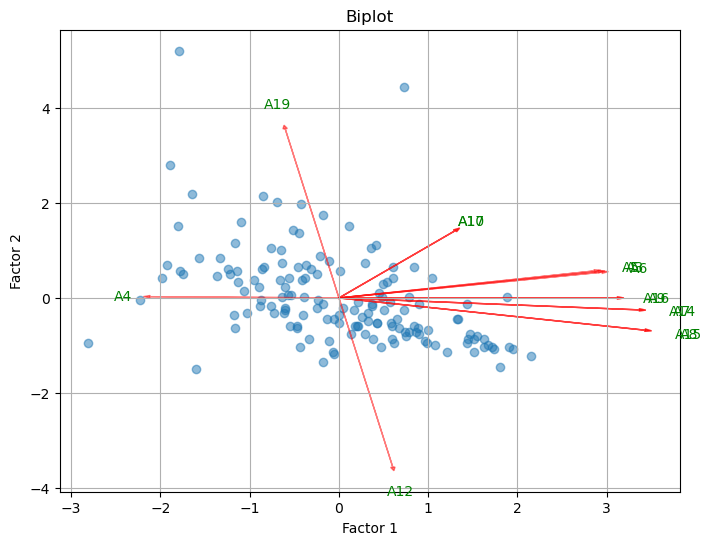

In [102]:
def biplot_fa(fa, data, title="Biplot", a=1.5):
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.5)
    for i in range(data.shape[1]):
        plt.arrow(0, 0, fa.loadings_[i, 0] * a, fa.loadings_[i, 1] * a, color='r', alpha=0.5, head_width=0.05)
        plt.text(fa.loadings_[i, 0] * (a + .5), fa.loadings_[i, 1] * (a + .5), data.columns[i], color='g', ha='center', va='center')
    plt.xlabel(f"Factor 1")
    plt.ylabel(f"Factor 2")
    plt.title(title)
    plt.grid()
    plt.show()

biplot_fa(fa_minres, df, title="Biplot", a=3.5)

## 4. Conclusiones